# Plot spatial distribution of dissipation 

### Imports

In [1]:
path = "../Outputs/"

In [2]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Extracting variables from Forced tides ouput

In [3]:
filename = path+"Htide_R_colat_per_Io.txt"
names = ["R(m)","colat(deg)","longi(deg)","Htide(W.m-3)"]
data = pd.read_csv(filename, skipinitialspace=True, sep=" ", names=names, index_col=False)
Radius = data["R(m)"].unique()
Theta = data["colat(deg)"].unique()

# Assign values of H for each couple (R, theta)
Values = np.zeros((Theta.size, Radius.size )) # Grid
for ir, r in enumerate(Radius):
    for it, theta in enumerate(Theta):
        i = data.loc[(data["R(m)"] ==r) & (data["colat(deg)"]==theta)]
        #print(i["Htide(W.m-3)"].values)
        if i["Htide(W.m-3)"].size >1:
            Values[it, ir] = i["Htide(W.m-3)"].values[0]
        else: 
            if i["Htide(W.m-3)"].size > 0:
                Values[it, ir] = i["Htide(W.m-3)"].values

# Use cartesian coordinates X,Y better for plotting
R, T = np.meshgrid(Radius/1e3, Theta)
X = R * np.cos(T*np.pi/180.)
Y = R * np.sin(T*np.pi/180.)

FileNotFoundError: [Errno 2] File ../Outputs/Htide_R_colat_per_Io.txt does not exist: '../Outputs/Htide_R_colat_per_Io.txt'

/home/mergny-c/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


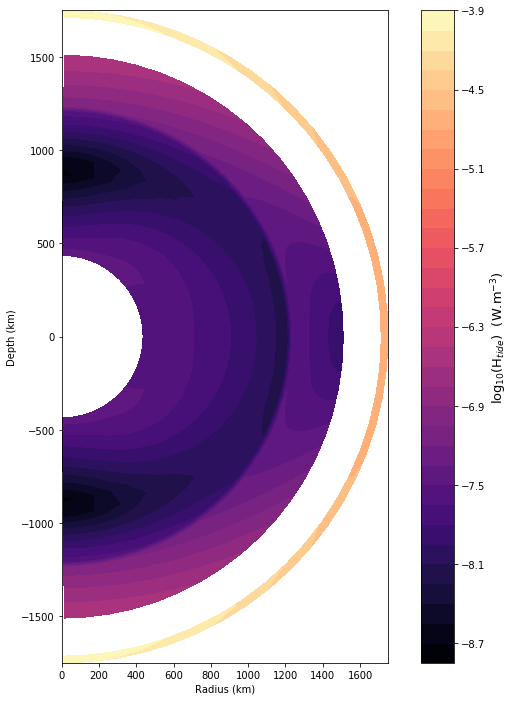

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
sc = ax.contourf(Y, X, np.log(np.array(Values))/np.log(10), 40, cmap=plt.cm.magma)
ax.set_aspect("equal")
plt.xlabel("Radius (km)")
plt.ylabel("Depth (km)")
cbar=plt.colorbar(sc)
cbar.set_label("log$_{10}$(H$_{tide}$)  (W.m$^{-3})$", fontsize = 13)
plt.savefig("spatial_dist.pdf")

In [ ]:
#!jupyter nbconvert --to script config_template.ipynb